[View in Colaboratory](https://colab.research.google.com/github/Hamahmi/CIFAR-10/blob/master/CIFARHM.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

%matplotlib inline

from keras                     import regularizers
from keras.models              import Sequential
from keras.layers              import Dense
from keras.layers              import Dropout
from keras.layers              import Conv2D
from keras.layers              import Activation
from keras.layers              import MaxPooling2D
from keras.layers              import Flatten
from keras.layers              import BatchNormalization
from keras.datasets            import cifar10
from keras.callbacks           import ReduceLROnPlateau
from keras.optimizers          import RMSprop
from matplotlib.pyplot         import imshow
from keras.utils.np_utils      import to_categorical
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator


print("\nImporting ✓\n")

Using TensorFlow backend.



Importing ✓



In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("\nLoading ✓\n")


Loading ✓



In [0]:
def getClass(x):
    return {
        0: "Airplane",
        1: "Automobile",
        2: "Bird",
        3: "Cat",
        4: "Deer",
        5: "Dog",
        6: "Frog",
        7: "Horse",
        8: "Ship",
        9: "Truck",
    }[x]
  
def check(x):
    if x >= 0.8400:
      return "\nPass ✓✓✓\n"
    return "\nFail ✗✗✗\n"

In [4]:
print("\nThe classes we have are :\n")

classes = np.unique(y_train)

for i in range(len(classes)):
  x = classes[i]
  print("                         " , x , "-> " + getClass(x))



The classes we have are :

                          0 -> Airplane
                          1 -> Automobile
                          2 -> Bird
                          3 -> Cat
                          4 -> Deer
                          5 -> Dog
                          6 -> Frog
                          7 -> Horse
                          8 -> Ship
                          9 -> Truck


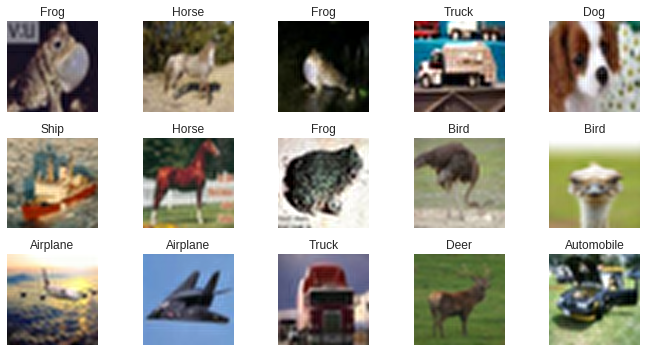

In [5]:
indices = np.random.randint(0, 50000, 15)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 5),subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, index in zip(axes.flat, indices):
    ax.imshow(x_train[index], interpolation='sinc', cmap='viridis')
    ax.set_title(str(getClass(y_train[index][0])))

plt.tight_layout()
plt.show()

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train.reshape(-1, 32, 32, 3) / 255 
x_test  =  x_test.reshape(-1, 32, 32, 3) / 255
print(x_train.shape)

y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test ,10)
print(y_train.shape)


print("\nReshaping ✓\n")

(50000, 32, 32, 3)
(50000, 10)

Reshaping ✓



In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=0)

In [0]:
model = Sequential()

model.add(Conv2D(128, padding='same', kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
#model.add(BatchNormalization())
model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, padding='same', kernel_size=(5, 5), activation='relu'))
#model.add(BatchNormalization())
model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))



model.add(Flatten())

# Output layer
model.add(Dense(units=10, activation='softmax'))



In [9]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
compiled_model = model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print("\nCompiling ✓\n")


Compiling ✓



In [0]:
# learning rate annealer
learning_rate_reduction = ReduceLROnPlateau( monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [12]:

#fitting_model = model.fit(x = x_train, y = y_train,validation_split=0.2, epochs=100, verbose=2, shuffle=True)

#fitting_model = model.fit(x = x_train, y = y_train, epochs=32, shuffle=True, validation_split=0.1)
fitting_model = model.fit_generator( datagen.flow(x_train,y_train, batch_size=100), epochs = 32,validation_data = (x_val,y_val),verbose = 1,callbacks=[learning_rate_reduction])


print("\nTraining ✓\n")

Epoch 1/32
450/450 [==============================] - 63s 140ms/step - loss: 2.0834 - acc: 0.3792 - val_loss: 2.0526 - val_acc: 0.3880
Epoch 2/32
450/450 [==============================] - 60s 133ms/step - loss: 1.4387 - acc: 0.5439 - val_loss: 1.5507 - val_acc: 0.4614
Epoch 3/32
450/450 [==============================] - 60s 134ms/step - loss: 1.2252 - acc: 0.6162 - val_loss: 1.1113 - val_acc: 0.6356
Epoch 4/32
450/450 [==============================] - 60s 133ms/step - loss: 1.1649 - acc: 0.6562 - val_loss: 0.9390 - val_acc: 0.6598
Epoch 5/32
450/450 [==============================] - 60s 133ms/step - loss: 1.0784 - acc: 0.6813 - val_loss: 1.2380 - val_acc: 0.6010
Epoch 6/32
450/450 [==============================] - 60s 133ms/step - loss: 1.0244 - acc: 0.6970 - val_loss: 1.0471 - val_acc: 0.6562
Epoch 7/32
450/450 [==============================] - 60s 133ms/step - loss: 0.9048 - acc: 0.7241 - val_loss: 0.8258 - val_acc: 0.7310
Epoch 8/32
450/450 [==============================] - 6

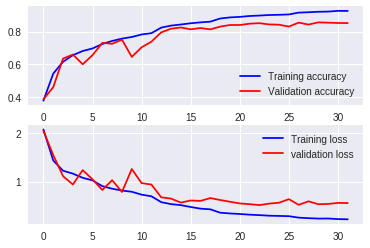

In [13]:
fig, ax = plt.subplots(2,1)

# Plot the accuracy curve for training and validation 
ax[0].plot(fitting_model.history['acc'], color='b', label="Training accuracy")
ax[0].plot(fitting_model.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

# Plot the loss curve for training and validation 
ax[1].plot(fitting_model.history['loss'], color='b', label="Training loss")
ax[1].plot(fitting_model.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [14]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

print(check(scores[1]))

10000/10000 [==============================] - 7s 651us/step
Test loss: 0.5648297820687294
Test accuracy: 0.846

Pass ✓✓✓

